#Import libraries

In [43]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# Load Dataset 

In [44]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [45]:
corpus = nltk.corpus.treebank.tagged_sents()

In [46]:
print(corpus[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


#Data preprocessing

In [47]:
print("Celkový počet viet: ", len(corpus))
print("Celkový počet slov:", len(nltk.corpus.treebank.tagged_words()))

Celkový počet viet:  3914
Celkový počet slov: 100676


In [49]:
#store sentences and tags
sen =[]
sen_tags = [] 

In [ ]:
#split to train and test set

(X_train, X_test,  y_train, y_test) = train_test_split(sen, sen_tags, test_size=0.2)

In [9]:
words = set([])
tags = set([])

In [10]:
for s in X_train:
    for w in s:
        words.add(w.lower())
 
for ts in y_train:
    for t in ts:
        tags.add(t)
 
word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0  
word2index['-OOV-'] = 1  
 
tag2index = {t: i + 1 for i, t in enumerate(list(tags))}
tag2index['-PAD-'] = 0  
 

In [11]:
X_train

[array(['Ginnie', 'Mae', "'s", '9', '%', 'issue', 'for', 'November',
        'delivery', 'finished', 'at', '98', '5\\/8', ',', 'up', '2\\/32',
        ',', 'and', 'its', '9', '1\\/2', '%', 'issue', 'at', '100',
        '22\\/32', ',', 'also', 'up', '2\\/32', '.'], dtype='<U8'),
 array(['With', 'only', 'two', 'issues', 'under', 'its', 'belt', ',',
        'Garbage', 'has', 'alienated', 'some', 'would-be', 'advertisers',
        'and', 'raised', 'the', 'ire', 'of', 'others', '.'], dtype='<U11'),
 array(['Robert', 'L.', 'Bernstein', ',', 'chairman', 'and', 'president',
        'of', 'Random', 'House', 'Inc.', ',', 'announced', 'his',
        'resignation', 'from', 'the', 'publishing', 'house', '0', 'he',
        'has', 'run', '*T*-1', 'for', '23', 'years', '.'], dtype='<U11'),
 array(['More', 'common', 'chrysotile', 'fibers', 'are', 'curly', 'and',
        'are', 'more', 'easily', 'rejected', '*-1', 'by', 'the', 'body',
        ',', 'Dr.', 'Mossman', 'explained', '0', '*T*-2', '.'],
     

In [12]:
X_train_sen = []
X_test_sen = []
y_train_tag = []
y_test_tag = []

In [13]:
for s in X_train:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    X_train_sen.append(s_int)
 
for s in X_test:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    X_test_sen.append(s_int)
 
for s in y_train:
    y_train_tag.append([tag2index[t] for t in s])
 
for s in y_test:
    y_test_tag.append([tag2index[t] for t in s])

In [14]:
print(X_train_sen[0])
print(X_test_sen[0])
print(y_train_tag[0])
print(y_test_tag[0])

[941, 2285, 8818, 6457, 3985, 4437, 2093, 8951, 2769, 6504, 8903, 4535, 9417, 9231, 845, 3441, 9231, 7488, 5154, 6457, 2319, 3985, 4437, 8903, 3804, 5475, 9231, 2171, 845, 3441, 5439]
[5955, 8839, 2599, 283, 855, 9111, 1614, 2283, 4082, 1500, 3417, 1135, 4748, 2698, 6392, 4500, 3093, 2675, 5439]
[20, 20, 26, 41, 24, 24, 10, 20, 24, 2, 10, 41, 41, 44, 1, 41, 44, 14, 35, 41, 41, 24, 24, 10, 41, 41, 44, 1, 1, 41, 36]
[38, 10, 40, 38, 10, 40, 6, 24, 4, 6, 20, 2, 37, 10, 42, 41, 41, 11, 36]


In [22]:
max_len = len(max(X_train_sen, key=len))

In [23]:
max_len

271

In [29]:
#ensure same length, padding of sentences and tags
X_train_sen = pad_sequences(X_train_sen, maxlen=max_len, padding='post')
X_test_sen = pad_sequences(X_test_sen, maxlen=max_len, padding='post')
y_train_tag = pad_sequences(y_train_tag, maxlen=max_len, padding='post')
y_test_tag = pad_sequences(y_test_tag, maxlen=max_len, padding='post')

In [30]:
print(X_train_sen[0])
print(X_test_sen[0])
print(y_train_tag[0])
print(y_test_tag[0])

[ 941 2285 8818 6457 3985 4437 2093 8951 2769 6504 8903 4535 9417 9231
  845 3441 9231 7488 5154 6457 2319 3985 4437 8903 3804 5475 9231 2171
  845 3441 5439    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

#Build model


In [37]:
model = Sequential()
model.add(InputLayer(input_shape=(max_len, )))
model.add(Embedding(len(word2index), 128))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2index))))
model.add(Activation('softmax'))

In [38]:
history = model.compile(loss='categorical_crossentropy',optimizer=Adam(0.001),metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 271, 128)          1295744   
                                                                 
 bidirectional_1 (Bidirectio  (None, 271, 512)         788480    
 nal)                                                            
                                                                 
 time_distributed_1 (TimeDis  (None, 271, 47)          24111     
 tributed)                                                       
                                                                 
 activation_1 (Activation)   (None, 271, 47)           0         
                                                                 
Total params: 2,108,335
Trainable params: 2,108,335
Non-trainable params: 0
_________________________________________________________________


In [40]:
def to_categorical(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

In [41]:
cat_train_tags_y = to_categorical(y_train_tag, len(tag2index))
print(cat_train_tags_y[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [45]:
saved_model = 'pos.hdf5'
checkpoint = ModelCheckpoint(saved_model, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

epochs = 3
batch_size = 128
history = model.fit(X_train_sen, to_categorical(y_train_tag, len(tag2index)), validation_data=(X_test_sen, to_categorical(y_test_tag, len(tag2index))),epochs=epochs,batch_size=batch_size, callbacks = [checkpoint])

Epoch 1/3
25/25 [==============================] - ETA: 0s - loss: 0.3019 - accuracy: 0.9169
Epoch 1: val_accuracy improved from -inf to 0.91698, saving model to pos.hdf5
25/25 [==============================] - 149s 6s/step - loss: 0.3019 - accuracy: 0.9169 - val_loss: 0.2990 - val_accuracy: 0.9170
Epoch 2/3
25/25 [==============================] - ETA: 0s - loss: 0.2915 - accuracy: 0.9175
Epoch 2: val_accuracy improved from 0.91698 to 0.91714, saving model to pos.hdf5
25/25 [==============================] - 147s 6s/step - loss: 0.2915 - accuracy: 0.9175 - val_loss: 0.2903 - val_accuracy: 0.9171
Epoch 3/3
25/25 [==============================] - ETA: 0s - loss: 0.2820 - accuracy: 0.9191
Epoch 3: val_accuracy improved from 0.91714 to 0.92280, saving model to pos.hdf5
25/25 [==============================] - 155s 6s/step - loss: 0.2820 - accuracy: 0.9191 - val_loss: 0.2820 - val_accuracy: 0.9228


In [46]:
def trainingProcess(history):
    plt.style.use('ggplot')
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    plt.style.use('ggplot')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

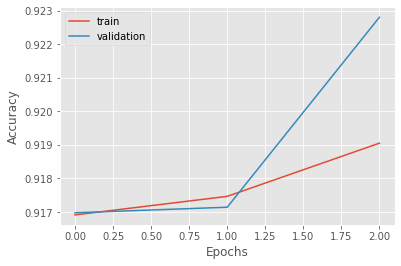

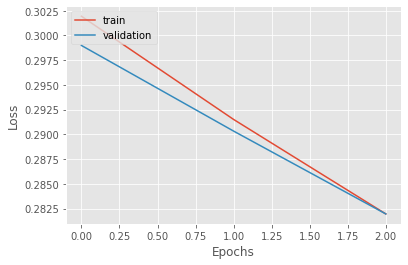

In [49]:
trainingProcess(history)

In [50]:
# load best model
myModel = load_model('pos.hdf5') 

In [58]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 11.3 MB/s eta 0:00:00


In [59]:
import shap
shap.initjs()

In [60]:
# Create an explainer object
explainer = shap.explainers.Permutation(model.predict, X_train_sen)

In [ ]:
# Explain the first test instance
shap_values = explainer(X_test_sen[:10])

174/174 [==============================] - 103s 594ms/step


Permutation explainer:  10%|█         | 1/10 [00:00<?, ?it/s]

133/133 [==============================] - 75s 567ms/step


Permutation explainer:  30%|███       | 3/10 [18:34<33:13, 284.80s/it]

128/128 [==============================] - 72s 563ms/step


Permutation explainer:  40%|████      | 4/10 [28:35<41:40, 416.70s/it]

130/130 [==============================] - 73s 564ms/step


Permutation explainer:  50%|█████     | 5/10 [36:30<36:32, 438.56s/it]

129/129 [==============================] - 71s 555ms/step


Permutation explainer:  60%|██████    | 6/10 [46:26<32:52, 493.14s/it]

165/165 [==============================] - 90s 546ms/step


Permutation explainer:  70%|███████   | 7/10 [1:01:21<31:19, 626.38s/it]

138/138 [==============================] - 76s 552ms/step


Permutation explainer:  80%|████████  | 8/10 [1:11:09<20:28, 614.30s/it]

138/138 [==============================] - 78s 563ms/step


Permutation explainer:  90%|█████████ | 9/10 [1:20:52<10:04, 604.40s/it]

120/120 [==============================] - 69s 575ms/step


Permutation explainer: 100%|██████████| 10/10 [1:29:53<00:00, 584.58s/it]

150/166 [==========================>...] - ETA: 8s

In [ ]:
shap.plots.bar(shap_values)